# LeNet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation

from tensorflow.keras.datasets import mnist
np.random.seed(101)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

In [4]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [5]:
X_train_scaled.shape
X_test_scaled.shape

(10000, 28, 28, 1)

In [6]:
Y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
# LeNet
model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1936)              0         
__________

In [9]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train_scaled, Y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
48000/48000 [==============================] - 7s 144us/sample - loss: 0.2651 - acc: 0.9234 - val_loss: 0.0844 - val_acc: 0.9735
Epoch 2/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0733 - acc: 0.9778 - val_loss: 0.0680 - val_acc: 0.9794
Epoch 3/10
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0507 - acc: 0.9841 - val_loss: 0.0631 - val_acc: 0.9812
Epoch 4/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0400 - acc: 0.9877 - val_loss: 0.0496 - val_acc: 0.9856
Epoch 5/10
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0316 - acc: 0.9900 - val_loss: 0.0513 - val_acc: 0.9854
Epoch 6/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0247 - acc: 0.9920 - val_loss: 0.0508 - val_acc: 0.9857
Epoch 7/10
48000/48000 [==============================] - 5s 1

In [11]:
score = model.evaluate(X_test_scaled, Y_test)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0386 - acc: 0.9889


In [12]:
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

Test Score  0.038594891983018166
Test Accuracy  0.9889


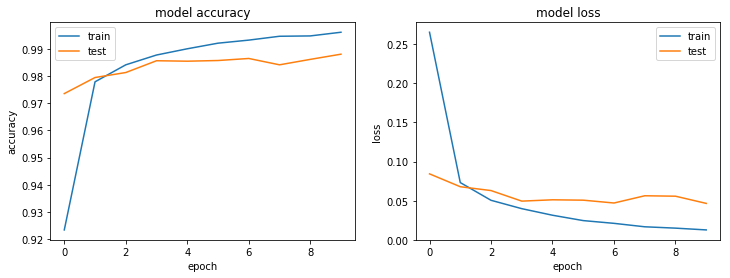

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [14]:
y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
model.predict_classes(X_test_scaled)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred_classes)

array([[ 974,    0,    0,    1,    0,    1,    1,    1,    1,    1],
       [   0, 1130,    0,    0,    0,    3,    1,    0,    0,    1],
       [   1,    0, 1021,    4,    0,    0,    0,    4,    2,    0],
       [   0,    0,    2,  994,    0,   12,    0,    0,    0,    2],
       [   1,    0,    1,    0,  967,    0,    1,    0,    1,   11],
       [   0,    0,    0,    3,    0,  887,    2,    0,    0,    0],
       [   5,    2,    1,    0,    7,    4,  938,    0,    1,    0],
       [   0,    3,    5,    1,    0,    0,    0, 1016,    1,    2],
       [   2,    0,    4,    2,    0,    1,    0,    1,  962,    2],
       [   0,    0,    0,    0,    2,    6,    0,    0,    1, 1000]],
      dtype=int64)

Test Accuracy : 0.9889


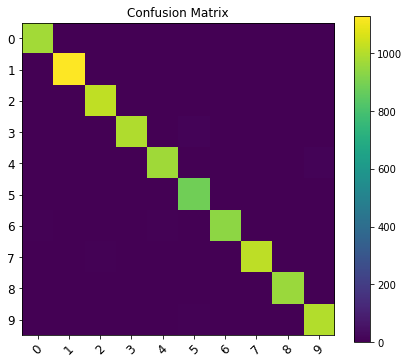

In [18]:
plt.figure(figsize=(7,6))
plt.imshow(confusion_matrix(y_test, y_pred_classes))
plt.colorbar()
plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), fontsize=12)
plt.title('Confusion Matrix')

print('Test Accuracy :', accuracy_score(y_test, y_pred_classes))